#**DATA PREPARATION 2**

**Goal** : Preprocessing the data to be "machine learning" ready

**Steps**
1. Importing data prepared from data preparation 1 along withe the necessary libraries
2. Splitting the data set from onset to avoid bias
3. Converting all dtytpes into numeric dtypes
4. Handling missing values
5. Selecting relevant columns from ML data
6. Outlier detection
7. Handling data imbalance using SMOTE

## Computing the descriptors

In [ ]:
!pip install rdkit
!pip install mordred

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.7/29.7 MB 35.0 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.8/128.8 kB 4.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 32.9 MB/s eta 0:00:00
  Created wheel for mordred: filename=mordred-1.2.0-py3-none-any.whl size=176723 sha256=8615615113ee07ddf4081e9f627b79973afdf991335f09140edbfbe7cc2c9ce4
  Stored in directory: /root/.cache/pip/wheels/a7/4f/b8/d4c6591f6ac944aaced7865b349477695f662388ad958743c7
Successfully built mordred
ERROR: Operation cancelled by user


In [ ]:
import pandas as pd
import numpy as np


url = "https://raw.githubusercontent.com/Ghaby-X/VP16-inhibitors-pred/main/Assayresults_preprocessed.csv"

In [ ]:
df = pd.read_csv(url)
df

,Unnamed: 0,PUBCHEM_CID,Canonical_smiles,Activity_score,Activity_outcome
0,0,72810.0,C1=CC2=C(C3=C(C=CC=N3)C(=O)C2=O)N=C1,100.0,1
1,1,23618032.0,CN(C)C1=NC=NC2=C1N=CN2[C@H]3[C@@H]([C@@H]([C@H...,99.0,1
2,2,99927.0,CC1C(C(CC(O1)OC2CC(OC(C2O)C)OC3=CC4=CC5=C(C(=O...,99.0,1
3,3,254021.0,C1=CC=C2C(=C1)C3=C(C=C(C=C3)N)C(=O)C2=O,99.0,1
4,4,45280821.0,CCC(C)C1C(CC(=O)O[C@H](C(=O)[C@H](C(=O)NC(C(=O...,99.0,1
...,...,...,...,...,...
2333,2337,665706.0,C1CC2=C(C1)NN=C2C3=NN=C4N3N=C(CS4)C5=CC=CC=C5,0.0,0
2334,2338,25015463.0,CN1CCC(CC1)NC(=O)C2=CC(=C(C=C2)NC3=NC=C4C(=N3)...,0.0,0
2335,2339,667208.0,CC1=CC2=C(C3=C(CCC3)C(=O)O2)C(=C1)OC(C)C(=O)OC,0.0,0
2336,2340,42628533.0,CN1CCC(CC1)NC(=O)C2=CC(=C(C=C2)NC3=NC=C4C(=N3)...,0.0,0


In [ ]:
from rdkit import Chem
from mordred import Calculator, descriptors

ModuleNotFoundError: ignored

In [ ]:
smiles_list = df['Canonical_smiles'].to_list()  # convert the Canonical Smiles columns to a list
mols = [Chem.MolFromSmiles(smi) for smi in smiles_list] # generates the 2D structures of molecular smiles

In [ ]:
#Function to calculate mordred descriptors
def mordred_desc(data):  #receives canonical smiles in a list datastructure
  calc = Calculator(descriptors, ignore_3D=True)  
  return calc.pandas(data)

In [ ]:
df_mordred = mordred_desc(mols)
df_mordred

In [ ]:
df1 = df_mordred.copy()

In [ ]:
df1.dtypes.unique()

array([dtype('float64'), dtype('int64'), dtype('O'), dtype('bool')],
      dtype=object)

In [ ]:
#function that checks if an entry dtype is numeric. If not, it converts it to numeric or not available

def float_converter(x):
    if not isinstance(x, (float, int, bool)):
        try:
            return float(x)
        except ValueError:
            return np.nan
    else:
        return x


# Apply the function to all columns in the DataFrame


In [ ]:
df2 =  df1.applymap(float_converter).copy()
df2

,ABC,ABCGG,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,LogEE_A,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
0,12.704061,10.489183,0,0,21.679248,2.500522,5.001045,21.679248,1.354953,3.734854,...,9.975203,49.287122,210.042927,9.547406,376,29,88.0,108.0,4.666667,3.500000
1,26.345939,21.039992,0,1,NaN,NaN,NaN,NaN,NaN,NaN,...,10.475737,87.611973,507.199695,7.803072,3400003745,57,180.0,216.0,NaN,7.583333
2,59.797706,41.739763,0,0,95.209049,2.573149,5.146298,95.209049,1.252751,5.260938,...,11.452400,116.888499,1084.472653,7.134689,32423,148,416.0,505.0,29.888889,16.333333
3,13.520558,11.114447,0,0,22.436038,2.509547,5.019095,22.436038,1.319767,3.792677,...,10.042771,50.615280,223.063329,8.579359,450,31,94.0,115.0,5.527778,3.666667
4,59.718429,48.210382,0,0,96.779823,2.445513,4.851677,96.779823,1.225061,5.262114,...,11.177523,134.866641,1111.641665,6.616915,30367,137,398.0,466.0,34.805556,17.611111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2333,18.849242,15.328468,0,0,31.713787,2.521082,4.896062,31.713787,1.378860,4.120187,...,10.205997,75.047243,322.100065,8.705407,1154,36,132.0,162.0,4.638889,4.916667
2334,29.852963,21.346319,0,1,49.974608,2.468887,4.896136,49.974608,1.315121,4.570280,...,10.549674,83.045006,521.311438,6.770278,5083,67,202.0,239.0,11.444444,8.361111
2335,17.165481,14.859018,0,0,27.856129,2.523211,5.005617,27.856129,1.266188,4.030589,...,10.154596,70.142462,302.115424,7.552886,980,37,118.0,142.0,8.000000,4.833333
2336,31.307617,21.998642,0,1,52.526684,2.449418,4.861108,52.526684,1.313167,4.616303,...,10.540038,85.147977,543.295788,7.055789,6018,68,210.0,246.0,11.944444,8.833333


In [ ]:
# Apply the function to all columns in the DataFrame
df2.isnull().sum()[df2.isnull().sum() == 2338]

SpAbs_Dt     2338
SpMax_Dt     2338
SpDiam_Dt    2338
SpAD_Dt      2338
SpMAD_Dt     2338
             ... 
MINssssSn    2338
MINsPbH3     2338
MINssPbH2    2338
MINsssPbH    2338
MINssssPb    2338
Length: 96, dtype: int64

In [ ]:
empty_cols = df2.isnull().sum()[df2.isnull().sum() == 2338].index
df2.drop(empty_cols, axis = 1, inplace = True)
df2

,ABC,ABCGG,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,LogEE_A,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
0,12.704061,10.489183,0,0,21.679248,2.500522,5.001045,21.679248,1.354953,3.734854,...,9.975203,49.287122,210.042927,9.547406,376,29,88.0,108.0,4.666667,3.500000
1,26.345939,21.039992,0,1,NaN,NaN,NaN,NaN,NaN,NaN,...,10.475737,87.611973,507.199695,7.803072,3400003745,57,180.0,216.0,NaN,7.583333
2,59.797706,41.739763,0,0,95.209049,2.573149,5.146298,95.209049,1.252751,5.260938,...,11.452400,116.888499,1084.472653,7.134689,32423,148,416.0,505.0,29.888889,16.333333
3,13.520558,11.114447,0,0,22.436038,2.509547,5.019095,22.436038,1.319767,3.792677,...,10.042771,50.615280,223.063329,8.579359,450,31,94.0,115.0,5.527778,3.666667
4,59.718429,48.210382,0,0,96.779823,2.445513,4.851677,96.779823,1.225061,5.262114,...,11.177523,134.866641,1111.641665,6.616915,30367,137,398.0,466.0,34.805556,17.611111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2333,18.849242,15.328468,0,0,31.713787,2.521082,4.896062,31.713787,1.378860,4.120187,...,10.205997,75.047243,322.100065,8.705407,1154,36,132.0,162.0,4.638889,4.916667
2334,29.852963,21.346319,0,1,49.974608,2.468887,4.896136,49.974608,1.315121,4.570280,...,10.549674,83.045006,521.311438,6.770278,5083,67,202.0,239.0,11.444444,8.361111
2335,17.165481,14.859018,0,0,27.856129,2.523211,5.005617,27.856129,1.266188,4.030589,...,10.154596,70.142462,302.115424,7.552886,980,37,118.0,142.0,8.000000,4.833333
2336,31.307617,21.998642,0,1,52.526684,2.449418,4.861108,52.526684,1.313167,4.616303,...,10.540038,85.147977,543.295788,7.055789,6018,68,210.0,246.0,11.944444,8.833333


In [ ]:
# df2.to_csv("df_mordred.csv")

In [ ]:
# # from google.colab import files
# # files.download("df_mordred.csv")

# # save directly to drive
# #!cp "df.mordred.csv" ""

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Importing datasets

In [212]:
import pandas as pd
import numpy as np


url = "https://raw.githubusercontent.com/Ghaby-X/VP16-inhibitors-pred/main/Assayresults_preprocessed.csv"
url_mordred = "https://raw.githubusercontent.com/Ghaby-X/VP16-inhibitors-pred/main/df_mordred.csv"

In [213]:
df_mordred = pd.read_csv(url_mordred)
df_raw = pd.read_csv(url)

In [214]:
df_mordred

,Unnamed: 0,ABC,ABCGG,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
0,0,12.704061,10.489183,0,0,21.679248,2.500522,5.001045,21.679248,1.354953,...,9.975203,49.287122,210.042927,9.547406,376,29,88.0,108.0,4.666667,3.500000
1,1,26.345939,21.039992,0,1,NaN,NaN,NaN,NaN,NaN,...,10.475737,87.611973,507.199695,7.803072,3400003745,57,180.0,216.0,NaN,7.583333
2,2,59.797706,41.739763,0,0,95.209049,2.573149,5.146298,95.209049,1.252751,...,11.452400,116.888499,1084.472653,7.134689,32423,148,416.0,505.0,29.888889,16.333333
3,3,13.520558,11.114447,0,0,22.436038,2.509547,5.019095,22.436038,1.319767,...,10.042771,50.615280,223.063329,8.579359,450,31,94.0,115.0,5.527778,3.666667
4,4,59.718429,48.210382,0,0,96.779823,2.445513,4.851677,96.779823,1.225061,...,11.177523,134.866641,1111.641665,6.616915,30367,137,398.0,466.0,34.805556,17.611111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2333,2333,18.849242,15.328468,0,0,31.713787,2.521082,4.896062,31.713787,1.378860,...,10.205997,75.047243,322.100065,8.705407,1154,36,132.0,162.0,4.638889,4.916667
2334,2334,29.852963,21.346319,0,1,49.974608,2.468887,4.896136,49.974608,1.315121,...,10.549674,83.045006,521.311438,6.770278,5083,67,202.0,239.0,11.444444,8.361111
2335,2335,17.165481,14.859018,0,0,27.856129,2.523211,5.005617,27.856129,1.266188,...,10.154596,70.142462,302.115424,7.552886,980,37,118.0,142.0,8.000000,4.833333
2336,2336,31.307617,21.998642,0,1,52.526684,2.449418,4.861108,52.526684,1.313167,...,10.540038,85.147977,543.295788,7.055789,6018,68,210.0,246.0,11.944444,8.833333


In [215]:
df_mordred.drop("Unnamed: 0", axis = 1, inplace = True)
df_mordred

,ABC,ABCGG,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,LogEE_A,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
0,12.704061,10.489183,0,0,21.679248,2.500522,5.001045,21.679248,1.354953,3.734854,...,9.975203,49.287122,210.042927,9.547406,376,29,88.0,108.0,4.666667,3.500000
1,26.345939,21.039992,0,1,NaN,NaN,NaN,NaN,NaN,NaN,...,10.475737,87.611973,507.199695,7.803072,3400003745,57,180.0,216.0,NaN,7.583333
2,59.797706,41.739763,0,0,95.209049,2.573149,5.146298,95.209049,1.252751,5.260938,...,11.452400,116.888499,1084.472653,7.134689,32423,148,416.0,505.0,29.888889,16.333333
3,13.520558,11.114447,0,0,22.436038,2.509547,5.019095,22.436038,1.319767,3.792677,...,10.042771,50.615280,223.063329,8.579359,450,31,94.0,115.0,5.527778,3.666667
4,59.718429,48.210382,0,0,96.779823,2.445513,4.851677,96.779823,1.225061,5.262114,...,11.177523,134.866641,1111.641665,6.616915,30367,137,398.0,466.0,34.805556,17.611111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2333,18.849242,15.328468,0,0,31.713787,2.521082,4.896062,31.713787,1.378860,4.120187,...,10.205997,75.047243,322.100065,8.705407,1154,36,132.0,162.0,4.638889,4.916667
2334,29.852963,21.346319,0,1,49.974608,2.468887,4.896136,49.974608,1.315121,4.570280,...,10.549674,83.045006,521.311438,6.770278,5083,67,202.0,239.0,11.444444,8.361111
2335,17.165481,14.859018,0,0,27.856129,2.523211,5.005617,27.856129,1.266188,4.030589,...,10.154596,70.142462,302.115424,7.552886,980,37,118.0,142.0,8.000000,4.833333
2336,31.307617,21.998642,0,1,52.526684,2.449418,4.861108,52.526684,1.313167,4.616303,...,10.540038,85.147977,543.295788,7.055789,6018,68,210.0,246.0,11.944444,8.833333


In [216]:
df_raw

,Unnamed: 0,PUBCHEM_CID,Canonical_smiles,Activity_score,Activity_outcome
0,0,72810.0,C1=CC2=C(C3=C(C=CC=N3)C(=O)C2=O)N=C1,100.0,1
1,1,23618032.0,CN(C)C1=NC=NC2=C1N=CN2[C@H]3[C@@H]([C@@H]([C@H...,99.0,1
2,2,99927.0,CC1C(C(CC(O1)OC2CC(OC(C2O)C)OC3=CC4=CC5=C(C(=O...,99.0,1
3,3,254021.0,C1=CC=C2C(=C1)C3=C(C=C(C=C3)N)C(=O)C2=O,99.0,1
4,4,45280821.0,CCC(C)C1C(CC(=O)O[C@H](C(=O)[C@H](C(=O)NC(C(=O...,99.0,1
...,...,...,...,...,...
2333,2337,665706.0,C1CC2=C(C1)NN=C2C3=NN=C4N3N=C(CS4)C5=CC=CC=C5,0.0,0
2334,2338,25015463.0,CN1CCC(CC1)NC(=O)C2=CC(=C(C=C2)NC3=NC=C4C(=N3)...,0.0,0
2335,2339,667208.0,CC1=CC2=C(C3=C(CCC3)C(=O)O2)C(=C1)OC(C)C(=O)OC,0.0,0
2336,2340,42628533.0,CN1CCC(CC1)NC(=O)C2=CC(=C(C=C2)NC3=NC=C4C(=N3)...,0.0,0


## Imputing and scaling preprocessor

 **Splitting the Dataset**

 The data set is splitted from the onset to prevent a look ahead bias

 "The purpose of Computation is *insight* not *numbers*" -Richard Hamming

In [217]:
X = df_mordred
y = df_raw["Activity_outcome"]
Y = df_raw["Activity_score"]

In [218]:
#Splitting our data into train and test data using train_test_split module

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.30, random_state=42)

In [219]:
X_train

,ABC,ABCGG,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,LogEE_A,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
1889,24.357869,17.794542,0,0,41.215625,2.347422,4.694843,41.215625,1.287988,4.369070,...,10.135749,67.414341,442.210387,7.132426,3719,46,158.0,179.0,10.500000,7.250000
892,22.969849,18.311017,0,0,35.941125,2.691135,5.306065,35.941125,1.283612,4.317123,...,10.877198,81.346741,390.240624,6.294204,1772,61,170.0,218.0,9.826389,5.687500
1753,15.604129,12.735781,0,0,26.207578,2.479573,4.834424,26.207578,1.310379,3.933379,...,9.887612,67.901737,271.157229,6.613591,873,28,104.0,121.0,5.145833,4.458333
1916,24.248480,17.563645,0,0,40.562314,2.355998,4.709981,40.562314,1.308462,4.360403,...,10.185617,80.094964,444.090369,9.251883,3439,44,160.0,184.0,8.750000,6.833333
849,19.746619,16.450850,2,0,33.938276,2.399239,4.777534,33.938276,1.305318,4.177400,...,10.086101,74.330916,372.125612,8.089687,1804,40,132.0,155.0,8.388889,6.027778
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1638,22.265059,17.119315,0,0,37.270853,2.486186,4.733166,37.270853,1.285202,4.279957,...,10.106959,78.650021,402.159100,7.733829,2877,42,146.0,168.0,9.750000,6.472222
1095,25.421655,19.002671,2,0,41.130085,2.417357,4.834715,41.130085,1.246366,4.405513,...,10.309652,68.924558,454.171316,8.257660,3832,51,168.0,193.0,12.583333,7.222222
1130,17.177412,13.499159,0,0,28.393729,2.445231,4.798280,28.393729,1.290624,4.024393,...,9.983638,64.253785,316.061470,9.030328,1044,38,116.0,136.0,7.388889,4.833333
1294,24.372550,18.814276,0,0,39.848651,2.583679,5.065890,39.848651,1.285440,4.372566,...,10.536327,81.901169,421.163771,7.799329,2894,55,168.0,203.0,10.673611,6.722222


In [220]:
Y_train = Y.iloc[X_train.index]
Y_test = Y.iloc[X_test.index]

**Handling missing values**

mean?, mode?, median?, interpolation?...

"https://www.sciencedirect.com/science/article/pii/S0895435618308710"

"To ask the right question is harder than to answer it" - George Cantor

In [202]:
# #All columns that contains missing values and the amount of missing values they contain
# X_train.isnull().sum()[X_train.isnull().sum() != 0 ]

In [203]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# # Plotting a KDE plot
# sns.kdeplot(X_train['SpAbs_A'])
# plt.xlabel('SpAbs_A')
# plt.ylabel('Density')
# plt.title('KDE Plot of SpAbs_A')
# plt.show()

In [204]:
# from sklearn.impute import SimpleImputer

# imputer = SimpleImputer(strategy = "mean")
# imputer.fit(X_train)
# X_train = pd.DataFrame(imputer.transform(X_train), columns = X_train.columns)
# X_train

In [205]:
#using KNNimputer to handle missing values
# from sklearn.impute import KNNImputer

# knn_impute = KNNImputer()
# knn_impute.fit(X_train)
# X_train = pd.DataFrame(knn_impute.transform(X_train), columns = X_train.columns)
# X_train

In [206]:
# # Plotting a KDE plot
# sns.kdeplot(X_train['SpAbs_A'])
# plt.xlabel('SpAbs_A')
# plt.ylabel('Density')
# plt.title('KDE Plot of SpAbs_A')
# plt.show()

In [207]:
# X_train.isnull().sum()[X_train.isnull().sum() != 0]

**Scaling of dataset**

Is it really necessary?

In [208]:
# # # scaling the data

# from sklearn.preprocessing import StandardScaler

# # Initialize the StandardScaler transformer
# scaler = StandardScaler()

# # Fit the transformer on the training data
# scaler.fit(X_train)

# # Transform the training data using the fitted transformer
# X_train = pd.DataFrame(scaler.transform(X_train), columns = X_train.columns)
# X_train

In [209]:
# # Plotting a KDE plot
# sns.kdeplot(X_train['SpAbs_A'])
# plt.xlabel('SpAbs_A')
# plt.ylabel('Density')
# plt.title('KDE Plot of SpAbs_A')
# plt.show()

In [221]:
# Preprocessing pipeline

from sklearn.pipeline import Pipeline

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
# from sklearn.impute import KNNImputer


preprocessor = Pipeline([
              ("Imputation", SimpleImputer(strategy = "mean")),
              ("Scaling", StandardScaler())
])

preprocessor.fit(X_train)



Pipeline(steps=[('Imputation', SimpleImputer()), ('Scaling', StandardScaler())])

In [222]:
X_train = pd.DataFrame(preprocessor.transform(X_train), columns = X_train.columns)
X_train

,ABC,ABCGG,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,LogEE_A,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
0,0.709000,0.423986,-0.302060,-0.424576,0.883258,-1.105795,-0.863566,0.883258,0.049383,0.864239,...,0.032137,-0.249090,0.639240,-1.019479,-0.224275,0.313637,0.520120,0.349788,0.624123,0.955756
1,0.454644,0.562551,-0.302060,-0.424576,0.247245,2.869737,2.994625,0.247245,-0.069801,0.639659,...,2.023508,0.953558,0.101450,-1.728947,-0.224275,1.337126,0.829638,1.154413,0.374871,-0.095985
2,-0.895127,-0.933232,-0.302060,-0.424576,-0.926451,0.422726,0.017508,-0.926451,0.659120,-1.019365,...,-0.634306,-0.207018,-1.130843,-1.458619,-0.224276,-0.914551,-0.872711,-0.846833,-1.357045,-0.923355
3,0.688954,0.362038,-0.302060,-0.424576,0.804481,-1.006599,-0.768011,0.804481,0.606913,0.826773,...,0.166070,0.845504,0.658695,0.774421,-0.224275,0.177171,0.571706,0.452945,-0.023419,0.675292
4,-0.136014,0.063486,3.372066,-0.424576,0.005737,-0.506454,-0.341598,0.005737,0.521311,0.035600,...,-0.101208,0.347950,-0.086007,-0.209257,-0.224275,-0.095759,-0.150502,-0.145366,-0.157038,0.133061
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1631,0.325491,0.242829,-0.302060,-0.424576,0.407587,0.499212,-0.621665,0.407587,-0.026496,0.478981,...,-0.045188,0.720776,0.224784,-0.510454,-0.224275,0.040706,0.210602,0.122843,0.346605,0.432223
1632,0.903939,0.748115,3.372066,-0.424576,0.872944,-0.296889,0.019339,0.872944,-1.084060,1.021792,...,0.499203,-0.118728,0.763014,-0.067085,-0.224275,0.654800,0.778052,0.638628,1.395005,0.937058
1633,-0.606822,-0.728424,-0.302060,-0.424576,-0.662839,0.025510,-0.210644,-0.662839,0.121160,-0.625887,...,-0.376401,-0.521910,-0.666167,0.586898,-0.224276,-0.232225,-0.563193,-0.537362,-0.527062,-0.670937
1634,0.711690,0.697570,-0.302060,-0.424576,0.718425,1.626852,1.478579,0.718425,-0.020001,0.879355,...,1.108003,1.001416,0.421447,-0.455015,-0.224275,0.927730,0.778052,0.844942,0.688363,0.600501


## **Feature Selection**

**Goal** : To select the most statistically relevant columns


Article link: "https://www.sciencedirect.com/science/article/pii/S0016236122006950#:~:text=The%20method%20focuses%20on%20reducing%20the%20number%20of,identify%20dominant%20chemical-structure%20features%20that%20impact%20property%20values."

In [223]:
#removing low_variance columns

from sklearn.feature_selection import VarianceThreshold

selector = VarianceThreshold()
selector.fit(X_train)

mask = selector.get_support() #gets boolean mask of selected features
high_var_cols = X_train.columns[mask]

X_train_var= X_train[high_var_cols].copy()
X_train_var

,ABC,ABCGG,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,LogEE_A,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
0,0.709000,0.423986,-0.302060,-0.424576,0.883258,-1.105795,-0.863566,0.883258,0.049383,0.864239,...,0.032137,-0.249090,0.639240,-1.019479,-0.224275,0.313637,0.520120,0.349788,0.624123,0.955756
1,0.454644,0.562551,-0.302060,-0.424576,0.247245,2.869737,2.994625,0.247245,-0.069801,0.639659,...,2.023508,0.953558,0.101450,-1.728947,-0.224275,1.337126,0.829638,1.154413,0.374871,-0.095985
2,-0.895127,-0.933232,-0.302060,-0.424576,-0.926451,0.422726,0.017508,-0.926451,0.659120,-1.019365,...,-0.634306,-0.207018,-1.130843,-1.458619,-0.224276,-0.914551,-0.872711,-0.846833,-1.357045,-0.923355
3,0.688954,0.362038,-0.302060,-0.424576,0.804481,-1.006599,-0.768011,0.804481,0.606913,0.826773,...,0.166070,0.845504,0.658695,0.774421,-0.224275,0.177171,0.571706,0.452945,-0.023419,0.675292
4,-0.136014,0.063486,3.372066,-0.424576,0.005737,-0.506454,-0.341598,0.005737,0.521311,0.035600,...,-0.101208,0.347950,-0.086007,-0.209257,-0.224275,-0.095759,-0.150502,-0.145366,-0.157038,0.133061
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1631,0.325491,0.242829,-0.302060,-0.424576,0.407587,0.499212,-0.621665,0.407587,-0.026496,0.478981,...,-0.045188,0.720776,0.224784,-0.510454,-0.224275,0.040706,0.210602,0.122843,0.346605,0.432223
1632,0.903939,0.748115,3.372066,-0.424576,0.872944,-0.296889,0.019339,0.872944,-1.084060,1.021792,...,0.499203,-0.118728,0.763014,-0.067085,-0.224275,0.654800,0.778052,0.638628,1.395005,0.937058
1633,-0.606822,-0.728424,-0.302060,-0.424576,-0.662839,0.025510,-0.210644,-0.662839,0.121160,-0.625887,...,-0.376401,-0.521910,-0.666167,0.586898,-0.224276,-0.232225,-0.563193,-0.537362,-0.527062,-0.670937
1634,0.711690,0.697570,-0.302060,-0.424576,0.718425,1.626852,1.478579,0.718425,-0.020001,0.879355,...,1.108003,1.001416,0.421447,-0.455015,-0.224275,0.927730,0.778052,0.844942,0.688363,0.600501


# Feature selection with PCC (correlation based feature selection method)

link: 
"https://johfischer.com/2021/08/06/correlation-based-feature-selection-in-python-from-scratch/"

In [178]:
X_train_var

,ABC,ABCGG,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,LogEE_A,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
1889,24.357869,17.794542,0,0,41.215625,2.347422,4.694843,41.215625,1.287988,4.369070,...,10.135749,67.414341,442.210387,7.132426,3719,46,158.0,179.0,10.500000,7.250000
892,22.969849,18.311017,0,0,35.941125,2.691135,5.306065,35.941125,1.283612,4.317123,...,10.877198,81.346741,390.240624,6.294204,1772,61,170.0,218.0,9.826389,5.687500
1753,15.604129,12.735781,0,0,26.207578,2.479573,4.834424,26.207578,1.310379,3.933379,...,9.887612,67.901737,271.157229,6.613591,873,28,104.0,121.0,5.145833,4.458333
1916,24.248480,17.563645,0,0,40.562314,2.355998,4.709981,40.562314,1.308462,4.360403,...,10.185617,80.094964,444.090369,9.251883,3439,44,160.0,184.0,8.750000,6.833333
849,19.746619,16.450850,2,0,33.938276,2.399239,4.777534,33.938276,1.305318,4.177400,...,10.086101,74.330916,372.125612,8.089687,1804,40,132.0,155.0,8.388889,6.027778
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1638,22.265059,17.119315,0,0,37.270853,2.486186,4.733166,37.270853,1.285202,4.279957,...,10.106959,78.650021,402.159100,7.733829,2877,42,146.0,168.0,9.750000,6.472222
1095,25.421655,19.002671,2,0,41.130085,2.417357,4.834715,41.130085,1.246366,4.405513,...,10.309652,68.924558,454.171316,8.257660,3832,51,168.0,193.0,12.583333,7.222222
1130,17.177412,13.499159,0,0,28.393729,2.445231,4.798280,28.393729,1.290624,4.024393,...,9.983638,64.253785,316.061470,9.030328,1044,38,116.0,136.0,7.388889,4.833333
1294,24.372550,18.814276,0,0,39.848651,2.583679,5.065890,39.848651,1.285440,4.372566,...,10.536327,81.901169,421.163771,7.799329,2894,55,168.0,203.0,10.673611,6.722222


**General Principle**

The correlation-based feature selection (CFS) method is a filter approach and therefore independent of the final classification model. It evaluates feature subsets only based on data intrinsic properties, as the name already suggest: correlations.

The goal is to find a feature subset with low feature-feature correlation, to avoid redundancy, and high feature-class correlation to maintain or increase predictive power.


Hall (2000) proposes a best first search approach using the merit as heuristic. The search starts with an empty subset and evaluates for each feature the merit of being added to the empty set. For this step the feature-feature correlation can be neglected, as the denominator of the equation above simplifies to 1, due to k=1.

In [236]:
df = X_train_var.copy()
label = "Activity"
df[label] = y_train
df


,ABC,ABCGG,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,LogEE_A,...,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2,Activity
0,0.709000,0.423986,-0.302060,-0.424576,0.883258,-1.105795,-0.863566,0.883258,0.049383,0.864239,...,-0.249090,0.639240,-1.019479,-0.224275,0.313637,0.520120,0.349788,0.624123,0.955756,1.0
1,0.454644,0.562551,-0.302060,-0.424576,0.247245,2.869737,2.994625,0.247245,-0.069801,0.639659,...,0.953558,0.101450,-1.728947,-0.224275,1.337126,0.829638,1.154413,0.374871,-0.095985,1.0
2,-0.895127,-0.933232,-0.302060,-0.424576,-0.926451,0.422726,0.017508,-0.926451,0.659120,-1.019365,...,-0.207018,-1.130843,-1.458619,-0.224276,-0.914551,-0.872711,-0.846833,-1.357045,-0.923355,1.0
3,0.688954,0.362038,-0.302060,-0.424576,0.804481,-1.006599,-0.768011,0.804481,0.606913,0.826773,...,0.845504,0.658695,0.774421,-0.224275,0.177171,0.571706,0.452945,-0.023419,0.675292,1.0
4,-0.136014,0.063486,3.372066,-0.424576,0.005737,-0.506454,-0.341598,0.005737,0.521311,0.035600,...,0.347950,-0.086007,-0.209257,-0.224275,-0.095759,-0.150502,-0.145366,-0.157038,0.133061,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1631,0.325491,0.242829,-0.302060,-0.424576,0.407587,0.499212,-0.621665,0.407587,-0.026496,0.478981,...,0.720776,0.224784,-0.510454,-0.224275,0.040706,0.210602,0.122843,0.346605,0.432223,0.0
1632,0.903939,0.748115,3.372066,-0.424576,0.872944,-0.296889,0.019339,0.872944,-1.084060,1.021792,...,-0.118728,0.763014,-0.067085,-0.224275,0.654800,0.778052,0.638628,1.395005,0.937058,0.0
1633,-0.606822,-0.728424,-0.302060,-0.424576,-0.662839,0.025510,-0.210644,-0.662839,0.121160,-0.625887,...,-0.521910,-0.666167,0.586898,-0.224276,-0.232225,-0.563193,-0.537362,-0.527062,-0.670937,0.0
1634,0.711690,0.697570,-0.302060,-0.424576,0.718425,1.626852,1.478579,0.718425,-0.020001,0.879355,...,1.001416,0.421447,-0.455015,-0.224275,0.927730,0.778052,0.844942,0.688363,0.600501,0.0


In [237]:
features = df.columns.to_list()
features.remove(label)
len(features)

1376

In [226]:
#computing the merits as proposed by Hall(2000)

from scipy.stats import pointbiserialr
from math import sqrt

def getMerit(subset, label):
    k = len(subset)

    # average feature-class correlation
    rcf_all = []
    for feature in subset:
        coeff = pointbiserialr( df[label], df[feature] )   #pointbiserialr is used to find the correlation because the class is binary
        rcf_all.append( abs( coeff.correlation ) )  #appends the absolute correlation between feature and class
    rcf = np.mean( rcf_all )

    # average feature-feature correlation
    corr = df[subset].corr()
    corr.values[np.tril_indices_from(corr.values)] = np.nan
    corr = abs(corr)
    rff = corr.unstack().mean()

    return (k * rcf) / sqrt(k + k * (k-1) * rff) # this returns the merit calculated from subsets

**Best First Search**

The search starts with iterating through all features and searching for the feature with the highest feature-class correlation.

In [249]:
np.isfinite(df[features[0]]).all()

True

In [246]:
np.isfinite(df[label]).all()

False

In [253]:
np.isinf(df[features[0]])[np.isinf(df[features[0]]) == True]

Series([], Name: ABC, dtype: bool)

In [250]:

# Check for infinite values in the label column
is_inf = np.isinf(df[label])

# Identify the rows with infinite values
rows_with_inf = df[is_inf]
rows_with_inf

,ABC,ABCGG,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,LogEE_A,...,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2,Activity


In [240]:
pointbiserialr(df[label], df[features[0]] )

ValueError: ignored

In [227]:
best_value = -1
best_feature = ''

#This code gets the highest correlated feature(i.e., between the feature and the class label)
for feature in features:
    coeff = pointbiserialr(df[label], df[feature] )
    abs_coeff = abs( coeff.correlation )  #gets the absolute coefficient of class and feature
    if abs_coeff > best_value:
        best_value = abs_coeff
        best_feature = feature

print("Feature %s with merit %.4f"%(best_feature, best_value))

ValueError: ignored

In [238]:
from scipy.stats import pointbiserialr
import numpy as np

best_value = -1
best_feature = ''


# This code gets the highest correlated feature (i.e., between the feature and the class label)
for feature in features:
    label_values = df[label].values
    feature_values = df[feature].values
    
    # Check for infinite or NaN values
    if np.isfinite(label_values).all() and np.isfinite(feature_values).all():
        coeff = pointbiserialr(label_values, feature_values)
        abs_coeff = abs(coeff.correlation)  # gets the absolute coefficient of class and feature
        if abs_coeff > best_value:
            best_value = abs_coeff
            best_feature = feature

print("Feature %s with merit %.4f" % (best_feature, best_value))

Feature  with merit -1.0000


# dd

In [134]:
def correlation(dataset, threshold):
  col_corr = set()  #Set of all the names of correlated columns
  corr_matrix = dataset.corr()
  for i in range(len(corr_matrix.columns)):
    for j in range(i):
      if abs(corr_matrix.iloc[i,j]) > threshold:
        colname = corr_matrix.columns[i]
        col_corr.add(colname)
  return col_corr

In [172]:
corr_features = correlation(X_train_var, 0.8)
# corr_features

In [166]:
col_names = list(X_train_var.drop(corr_features, axis = 1).columns)
len(col_names)

271

In [137]:
X_train = X_train[col_names]
X_train

,ABC,nAcid,nBase,SpMax_A,SpMAD_A,VE1_A,VR1_A,nAromAtom,nSpiro,nBridgehead,...,JGI2,JGI3,JGI4,JGI5,JGI6,JGI7,JGI8,JGI9,JGI10,WPath
0,0.709000,-0.302060,-0.424576,-1.105795,0.049383,9.507165e-01,-0.065671,-0.292680,-0.160901,-0.133202,...,-0.080308,-1.265924,-0.907443,0.372795,-0.082017,0.311392,0.154002,-0.899318,0.075292,-0.224275
1,0.454644,-0.302060,-0.424576,2.869737,-0.069801,7.483672e-01,-0.066428,-2.542444,-0.160901,-0.133202,...,3.146808,2.545151,1.554916,1.587287,1.701142,1.533861,1.056107,0.740749,0.654701,-0.224275
2,-0.895127,-0.302060,-0.424576,0.422726,0.659120,-1.762628e+00,-0.064999,-1.417562,5.000547,-0.133202,...,-0.862014,0.271804,-1.675270,-1.427359,-0.138002,-0.564439,-1.466979,-1.092585,-0.187635,-0.224276
3,0.688954,-0.302060,-0.424576,-1.006599,0.606913,1.715177e-01,-0.064134,0.644721,-0.160901,-0.133202,...,-0.800837,-0.453115,-0.369631,-1.623499,0.596343,-1.457311,-0.407692,-0.371410,-0.780358,-0.224275
4,-0.136014,3.372066,-0.424576,-0.506454,0.521311,1.255944e+00,-0.067247,0.644721,-0.160901,-0.133202,...,0.100718,-0.374852,0.037225,-1.013039,-0.446591,-0.254378,-0.111345,0.738314,-0.027353,-0.224275
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1631,0.325491,-0.302060,-0.424576,0.499212,-0.026496,-1.721706e+00,0.064251,-1.417562,-0.160901,-0.133202,...,0.277043,0.860275,-1.010948,0.150353,-0.142764,-1.011352,0.688982,0.186740,-0.316382,-0.224275
1632,0.903939,3.372066,-0.424576,-0.296889,-1.084060,1.910278e-01,-0.057414,0.457241,-0.160901,-0.133202,...,0.372762,-0.247435,0.771807,0.173964,-0.007733,0.076684,1.107239,-0.093126,0.576532,-0.224275
1633,-0.606822,-0.302060,-0.424576,0.025510,0.121160,-6.034123e-02,-0.067134,-0.292680,-0.160901,-0.133202,...,-0.530938,-0.716868,1.369521,-1.062981,2.835117,-0.699418,1.531660,0.367114,1.241454,-0.224276
1634,0.711690,-0.302060,-0.424576,1.626852,-0.020001,-3.431274e-01,-0.050922,-0.292680,5.000547,-0.133202,...,1.389298,0.650133,0.162422,0.583762,0.338367,0.941350,0.278636,-0.733404,0.303600,-0.224275


In [145]:
len(col_names)

369

In [24]:
# from sklearn.model_selection import cross_val_score
# from sklearn.model_selection import RepeatedStratifiedKFold
# from sklearn.feature_selection import RFECV
# from sklearn.tree import DecisionTreeClassifier

# # USE RFE_selectorCV instead of RFE_selector

# # define the method
# estimator=DecisionTreeClassifier()
# rfe_selector = RFECV(estimator, step = 1, cv = 5)
# # fit the model
# rfe_selector.fit(X_train, y_train)

# support_mask = rfe_selector.get_support() #gets boolean of selected features

In [26]:
# selected_columns = X_train.columns[support_mask]
# X_rfe = X_train[selected_columns]
# X_rfe

,AATS7d,AATS0s,AATS6s,AATS7s,AATS8s,AATS0Z,AATS1Z,AATS0p,AATS0i,AATS3i,...,n7FAHRing,nRot,SLogP,JGI2,JGI3,JGI4,JGI5,JGI6,JGI7,JGI8
0,-0.592489,-0.569834,-0.451193,-0.388061,-0.076272,-0.676894,-0.901690,-0.874770,0.310832,0.555063,...,0.0,1.644942,0.226711,-0.080308,-1.265924,-0.907443,0.372795,-0.082017,0.311392,0.154002
1,-1.392916,-0.614758,-0.997194,-0.915943,-0.756946,-0.896664,-1.513228,-1.116337,0.330054,-0.757551,...,0.0,-1.518296,-0.320929,3.146808,2.545151,1.554916,1.587287,1.701142,1.533861,1.056107
2,-0.501669,-0.998430,-0.975541,-1.078447,-0.771542,-0.848090,-1.332094,-0.694607,-0.131031,0.623353,...,0.0,-0.332082,-0.051493,-0.862014,0.271804,-1.675270,-1.427359,-0.138002,-0.564439,-1.466979
3,1.183956,0.534403,0.385777,0.506795,0.734698,0.090886,0.833573,0.129040,0.427691,0.968313,...,0.0,0.854132,-0.275281,-0.800837,-0.453115,-0.369631,-1.623499,0.596343,-1.457311,-0.407692
4,-0.742042,-1.054253,-0.750814,-1.148392,-0.393973,-0.232428,0.143230,-0.070981,0.188320,-1.533935,...,0.0,0.854132,0.175719,0.100718,-0.374852,0.037225,-1.013039,-0.446591,-0.254378,-0.111345
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1631,-0.150945,0.833680,0.829698,0.448045,0.713925,-0.509495,-0.624174,-0.722903,0.665353,1.049709,...,0.0,1.249537,-1.160274,0.277043,0.860275,-1.010948,0.150353,-0.142764,-1.011352,0.688982
1632,0.357323,0.769937,0.959797,0.898129,0.349567,-0.378896,-0.208273,-0.762720,1.356891,1.258713,...,0.0,1.644942,-1.926066,0.372762,-0.247435,0.771807,0.173964,-0.007733,0.076684,1.107239
1633,0.048561,0.033120,-0.100151,0.559639,0.203780,0.108194,0.275491,0.243422,-0.629399,-0.520780,...,0.0,-1.122892,0.343768,-0.530938,-0.716868,1.369521,-1.062981,2.835117,-0.699418,1.531660
1634,-0.144697,0.282265,0.175444,0.088740,0.507001,-0.521401,-0.513066,-0.477595,-0.085861,-0.041728,...,0.0,0.063323,-0.238470,1.389298,0.650133,0.162422,0.583762,0.338367,0.941350,0.278636


## **Data Imbalance**

In [ ]:
y_train

1889    0
892     1
1753    0
1916    0
849     1
       ..
1638    0
1095    0
1130    0
1294    0
860     1
Name: Activity_outcome, Length: 1636, dtype: int64

In [ ]:
y_train[y_train == 1]

892    1
849    1
436    1
800    1
393    1
      ..
769    1
130    1
330    1
466    1
860    1
Name: Activity_outcome, Length: 681, dtype: int64

In [ ]:
y_train[y_train == 0]

1889    0
1753    0
1916    0
2294    0
1437    0
       ..
2169    0
1638    0
1095    0
1130    0
1294    0
Name: Activity_outcome, Length: 955, dtype: int64

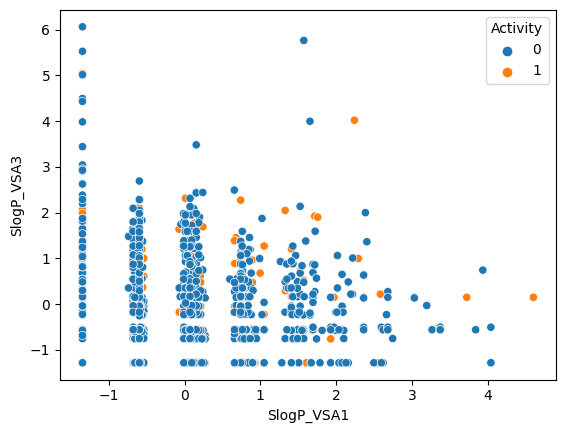

In [ ]:
#visualizing the datapoints across two features to observe the imbalance in datapoints

sns.scatterplot(data = X_train, x = "SlogP_VSA1", y = "SlogP_VSA3", hue = y)
plt.show()


In [ ]:
#resampling our data using SMOTE

from imblearn.over_sampling import SMOTE
# assume X is your feature matrix and y is your target vector
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

In [ ]:
X_resampled

,SlogP_VSA6,TIC5,EState_VSA1,SlogP_VSA2,EState_VSA10,PEOE_VSA8,SMR_VSA1,ATS7p,ATS5pe,SlogP_VSA1,...,GATS6c,NssSiH2,AATS7i,nG12AHRing,GATS8dv,n11AHRing,GATS3i,GATS4se,GATS8i,n6ARing
0,0.412576,0.749424,-0.594528,0.279615,-0.624107,1.252726,-0.614512,0.539593,0.217936,-0.596049,...,-0.086509,0.0,-0.012144,-0.101667,-0.191953,0.0,0.229393,-0.243069,0.091202,0.490403
1,-0.730362,-0.211745,0.220389,-0.267457,0.462361,-0.521668,0.667392,-0.158193,-0.102549,-0.596049,...,-0.119290,0.0,0.452674,-0.101667,-0.181521,0.0,-0.882690,-1.037264,0.458348,1.665678
2,1.934249,1.728281,0.260559,0.304982,1.232809,0.468168,0.805417,2.036765,1.508719,-0.596049,...,-0.247606,0.0,-0.264310,7.271433,-0.225487,0.0,0.125991,-0.603452,0.020965,-0.684873
3,0.136094,0.306807,0.107539,0.307285,0.417442,0.044180,-0.243891,0.280857,-0.021321,-0.596049,...,0.340771,0.0,-0.426477,-0.101667,0.298448,0.0,0.852457,2.228344,-1.053487,-0.684873
4,-1.606864,-0.242946,-0.594528,-0.534356,-0.030871,-0.957616,-0.140726,-0.324250,0.116766,-0.677920,...,-0.007629,0.0,0.377046,-0.101667,1.369382,0.0,0.613314,-0.400642,-1.086951,-0.684873
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2789,-2.147615,-0.732864,-0.594528,0.787529,-0.752775,0.135902,-1.138216,-0.793071,-0.615945,-1.346646,...,1.710066,0.0,-0.096805,-0.101667,1.210915,0.0,-1.166022,-0.712812,0.561809,1.226880
2790,-0.541050,-0.388089,-0.594528,-0.914451,-1.113952,-0.468294,-1.390476,-0.592184,-0.517675,0.072325,...,0.699747,0.0,1.263209,-0.101667,0.088814,0.0,0.011134,-1.752482,-1.447603,-0.684873
2791,-1.873318,0.772719,2.409090,1.045153,1.871632,0.238537,1.662534,0.664088,2.732611,-1.346646,...,0.624700,0.0,1.101593,-0.101667,0.312399,0.0,1.267984,-0.512582,-0.986608,4.870076
2792,-0.429408,-1.368804,1.357830,-0.373917,1.010679,-0.990459,0.200278,-1.067879,-1.055716,-0.738489,...,0.573566,0.0,-0.009993,-0.101667,2.724074,0.0,0.561854,0.796338,-1.998676,-0.219219


In [ ]:
y_resampled

0       0
1       0
2       1
3       0
4       0
       ..
2789    1
2790    1
2791    1
2792    1
2793    1
Name: Activity, Length: 2794, dtype: int64

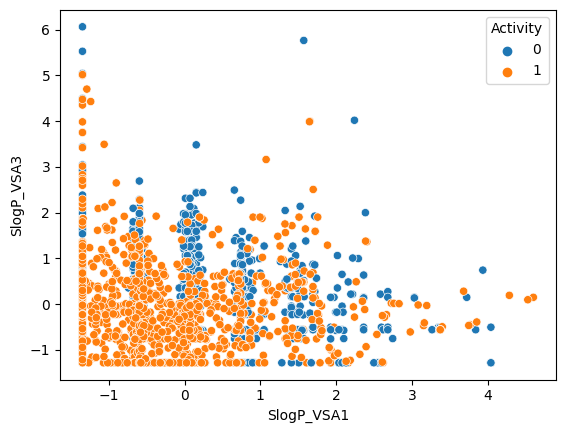

In [ ]:
#plotting resampled data to visualize datapoints distribution

sns.scatterplot(x = X_resampled["SlogP_VSA1"], y = X_resampled["SlogP_VSA3"], hue = y_resampled)
plt.show()

# Pipeline for processing test data

In [174]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler


Column_selector = ColumnTransformer(
    transformers=[
        ("relevant_cols", "passthrough", col_names)
    ]
)

test_pipeline = Pipeline([
              ("preprocessor", Column_selector),
              ("Imputation", SimpleImputer()),
              ("Scaling", StandardScaler())
])
test_pipeline.fit(X_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('relevant_cols',
                                                  'passthrough',
                                                  ['ABC', 'nAcid', 'nBase',
                                                   'SpMax_A', 'SpMAD_A',
                                                   'VE1_A', 'VR1_A',
                                                   'nAromAtom', 'nSpiro',
                                                   'nBridgehead', 'nHetero',
                                                   'nB', 'nN', 'nO', 'nS', 'nP',
                                                   'nF', 'nCl', 'nBr', 'nI',
                                                   'ATS0Z', 'AATS0dv', 'AATS8s',
                                                   'AATS0Z', 'AATS1Z', 'AATS0p',
                                                   'AATS0i', 'AATS3i', 'AATS4i',
                                                   'AATS5i', ...])])),
                ('Imputation', SimpleImputer()),
                ('Scaling', StandardScaler())])

In [175]:
transformed_X_train = test_pipeline.transform(X_train)
transformed_X_test = test_pipeline.transform(X_test)
transformed_X_train

array([[ 0.7089995 , -0.30205982, -0.42457551, ...,  0.37279522,
        -0.08201653,  0.1540019 ],
       [ 0.45464424, -0.30205982, -0.42457551, ...,  1.58728738,
         1.70114185,  1.05610679],
       [-0.89512704, -0.30205982, -0.42457551, ..., -1.42735921,
        -0.13800215, -1.46697875],
       ...,
       [-0.60682238, -0.30205982, -0.42457551, ..., -1.06298058,
         2.83511706,  1.53165979],
       [ 0.71168966, -0.30205982, -0.42457551, ...,  0.58376236,
         0.33836672,  0.27863604],
       [ 5.53690534,  3.37206558,  3.21210265, ...,  0.9906615 ,
         0.70696486,  0.89082743]])

In [176]:
# Random Forest model
from sklearn.ensemble import RandomForestClassifier


# Define and train the model
rfc = RandomForestClassifier()
rfc.fit(transformed_X_train, y_train)

RandomForestClassifier()

In [170]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(transformed_X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [155]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier()
gbc.fit(transformed_X_train, y_train)

GradientBoostingClassifier()

# Evaluation metrics

In [69]:
def evaluate(X_test, y_test, model, title="model"):
    from sklearn.metrics import matthews_corrcoef
    from sklearn.metrics import roc_auc_score
    import pandas as pd
    
    y_pred = model.predict(X_test)
    pred_proba = model.predict_proba(X_test)[:, 1]

    TP = sum((y_pred == 1) & (y_test == 1))
    TN = sum((y_pred == 0) & (y_test == 0))
    FP = sum((y_pred == 1) & (y_test == 0))
    FN = sum((y_pred == 0) & (y_test == 1))

    accuracy = (TP + TN) / (TP + TN + FN + FP)
    sensitivity = (TP) / (TP + FN)
    specificity = (TN) / (TN + FP)
    precision = (TP) / (TP + FP)
    F1 = 2 * ((precision * sensitivity) / (precision + sensitivity))
    balanced_accuracy = (sensitivity + specificity) / 2
    # mcc = ((TP * TN) - (FP * FN)) / np.sqrt((TP+TN)*(TP+FN)*(TN+FP)*(TN+FN))
    mcc = matthews_corrcoef(y_test, y_pred)
    AUCROC = roc_auc_score(y_test, pred_proba)

    values = [accuracy, sensitivity, specificity, precision, F1, balanced_accuracy, mcc, AUCROC]
    index = ["accuracy", "sensitivity", "specificity", "precision", "F1", "balanced_accuracy", "MCC", "auc_roc"]

    return pd.DataFrame({"scores": values}, index=index)


def plot_roc(X_test, y_test, model):
    import matplotlib.pyplot as plt
    from sklearn.metrics import roc_curve, roc_auc_score
    
    y_pred = model.predict(X_test)
    pred_proba = model.predict_proba(X_test)[:, 1]

    # Calculate the false positive rate (fpr), true positive rate (tpr), and thresholds
    fpr, tpr, thresholds = roc_curve(y_test, pred_proba)

    # Calculate the AUC
    roc_auc = roc_auc_score(y_test, pred_proba)

    # Plot the ROC curve
    plt.figure()
    plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', label='Random Guess')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

In [177]:
evaluate(transformed_X_test, y_test, rfc)

,scores
accuracy,0.782051
sensitivity,0.665574
specificity,0.871537
precision,0.799213
F1,0.726297
balanced_accuracy,0.768555
MCC,0.554055
auc_roc,0.876479
